# IMAGE COMPRESSION WITH JPEG-LS


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
def predictor(a, b, c) :
    if c >= max(a, b) :
        return min(a, b)
    elif c <= min(a, b) :
        return max(a, b)
    else :
        return a + b - c

In [5]:
def calculate_prediction_error(image):
    height, width = image.shape
    prediction_error = np.zeros((height, width), dtype=np.int32)
    
    for y in range(1, height):
        for x in range(1, width):
            a = image[y, x-1]
            b = image[y-1, x]
            c = image[y-1, x-1]
            pred = predictor(a, b, c)
            prediction_error[y, x] = int(image[y, x]) - pred
    
    return prediction_error

C:\Users\Luca\AppData\Local\Temp\ipykernel_9960\3541431274.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  return a + b - c


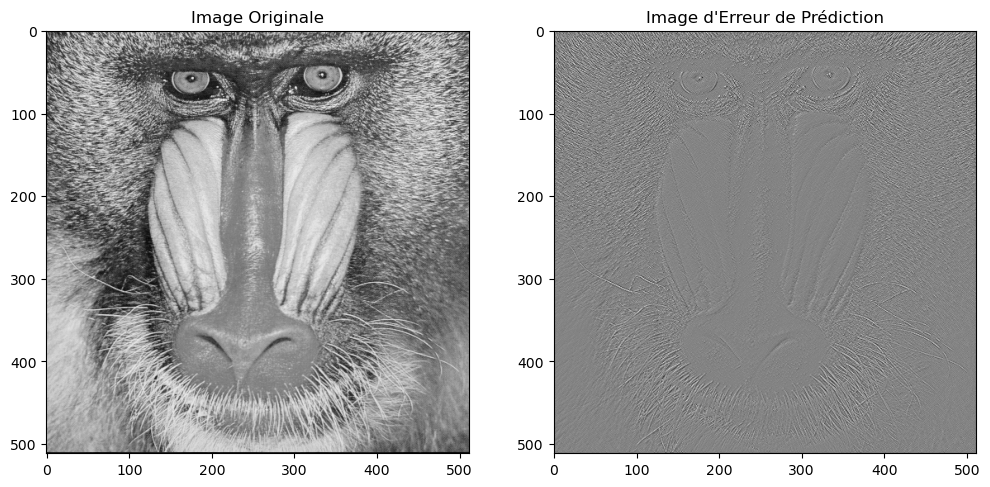

In [8]:
# Charger l'image en niveaux de gris
image = Image.open('baboon.png').convert('L')
image_array = np.array(image)

# Calculer l'image d'erreur de prédiction
prediction_error = calculate_prediction_error(image_array)

# Afficher l'image originale et l'image d'erreur
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Image Originale')
plt.imshow(image_array, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Image d\'Erreur de Prédiction')
plt.imshow(prediction_error, cmap='gray')

plt.show()